## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Jul 15 09:38:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mount your Google drive
1.   Click the `Files` Icon -> click `Mount drive` Icon.
2.   Change your working directory to your drive so that all the files will be saved to the drive and not the temporary runtime.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


import os
HOME = '/content/drive/MyDrive/Project_BLPR'

In [4]:
inference_folder = f'{HOME}/inferences'
try:
  os.mkdir(inference_folder)
except FileExistsError:
  pass
os.chdir(HOME)
print(os.getcwd())

/content/drive/MyDrive/Project_BLPR


In [ ]:
!ls {HOME}/inferences

## Install YOLOv8

In [7]:
# Pip install method (recommended)
%cd
!pip install ultralytics==8.0.112
!pip install dill

from IPython import display
display.clear_output()

In [8]:
# check if installed correctly
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


## Imports

In [9]:
import numpy as np
import glob
import cv2 as cv

from ultralytics import YOLO

## Import the required pipelines

In [10]:
%cd {HOME}

/content/drive/MyDrive/Project_BLPR


In [11]:
from blpr_pipeline import blp_text_extraction_pipeline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Test BLPR system for Image inputs

In [12]:
from image import blpr_image

In [16]:
# making inferences for 9 images in "{HOME}/data/test_blpr_image_1/"
for image_path in glob.glob(f'{HOME}/data/test_blpr_image_1/*')[:10]:
    blpr_image(image_path)

from IPython import display
display.clear_output()

In [13]:
!ls {HOME}/inferences

'blpr_image_detections-10_Dhaka Metro Ga 258945.png'
'blpr_image_detections-11_Dhaka Metro Ga 171911.png'
'blpr_image_detections-21_Dhaka Metro Ga 288348.png'
'blpr_image_detections-23_Dhaka Metro Ha 567523.png'
'blpr_image_detections-48_Dhaka Metro Ga 253827.png'
'blpr_image_detections-49_Dhaka Metro Ga 139008.png'
'blpr_image_detections-5_Dhaka Metro Ga 332897.png'
'blpr_image_detections-8_Dhaka Metro Ga 353102.png'
'blpr_image_detections-9_Dhaka Metro Ga 212885.png'
 blpr_video_detections-dhaka_traffic_test1.mp4


/content/drive/MyDrive/Project_BLPR/inferences/blpr_image_detections-11_Dhaka Metro Ga 171911.png


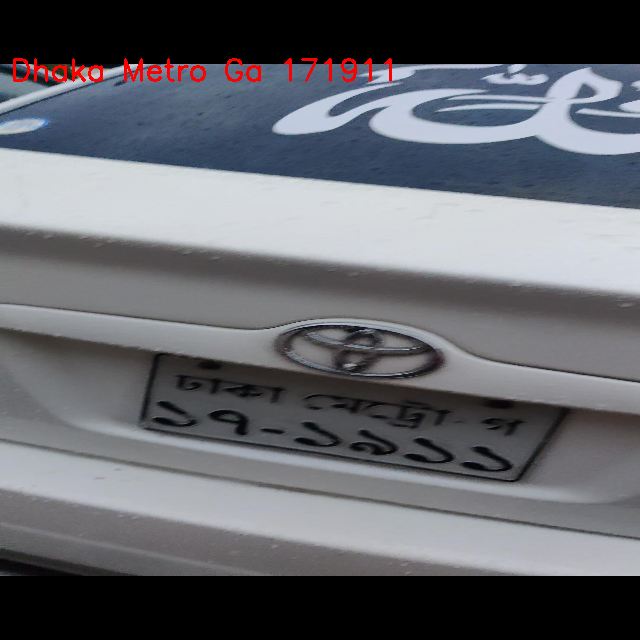



/content/drive/MyDrive/Project_BLPR/inferences/blpr_image_detections-10_Dhaka Metro Ga 258945.png


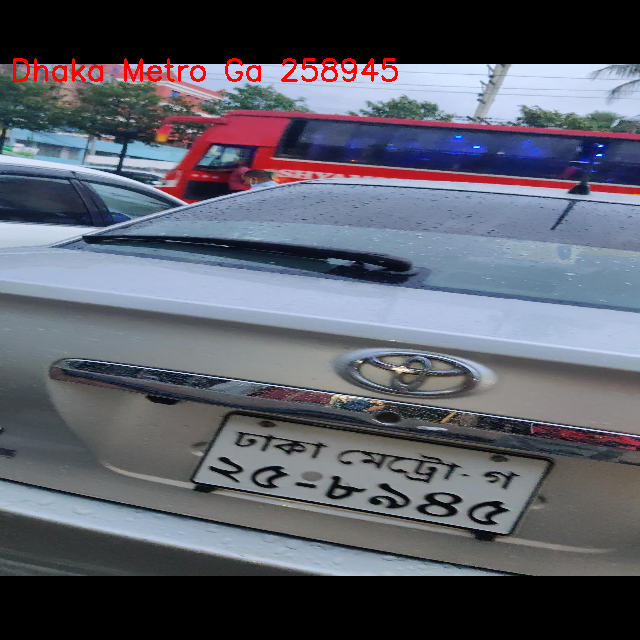



/content/drive/MyDrive/Project_BLPR/inferences/blpr_image_detections-48_Dhaka Metro Ga 253827.png


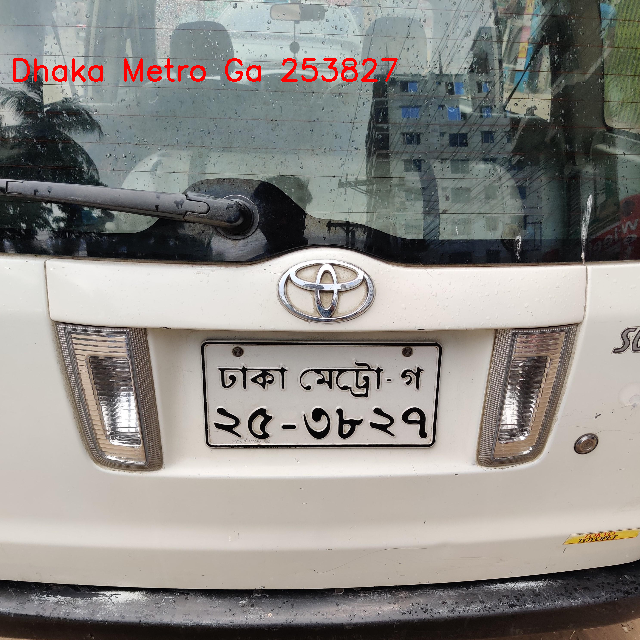

In [18]:
# showing the result of first 3 predictions
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/inferences/*')[:3]:
    print(image_path)
    display(Image(filename=image_path))
    print("\n")

## Test BLPR system for Pre-recorded Video inputs

In [14]:
from video import blpr_video

In [15]:
test_video_path = f"{HOME}/data/dhaka_traffic_test1.mp4"

In [17]:
video_detection_saved_to = blpr_video(test_video_path)

from IPython import display
display.clear_output()

In [26]:
video_detection_saved_to

'/content/drive/MyDrive/Project_BLPR/inferences/blpr_video_detections-dhaka_traffic_test1.mp4'

In [1]:
from IPython.display import HTML

HTML("""
<video width="640" height="854" controls>
  <source src="/content/drive/MyDrive/Project_BLPR/inferences/blpr_video_detections-dhaka_traffic_test1.mp4" type="video/mp4">
</video>
""")